In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# CHW2 Assigment 
## professor: Dr. Pakravan
## student: MohammadParsa Dini
### student ID : 400101204

# 1- Amplitude Modulation

# 1.1 , 1.2:

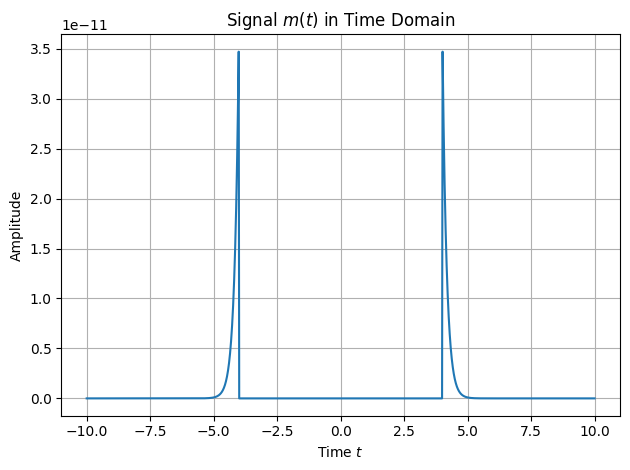

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 1000)  
m_t = np.exp(-6 * t) * (t-4 >= 0)*(t-8 <= 0) + np.exp(6 * t) * (-t-4 >= 0)* (-t-8 <=0)

plt.plot(t, m_t)
plt.title('Signal $m(t)$ in Time Domain')
plt.xlabel('Time $t$')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


We will rewrite our signal in order to find its bandwidth. We have $m(t) = e^{-36} e^{-6(t-6)} \prod{(\frac{t-6}{4})} +  e^{-36} e^{-6(t+6)} \prod{(\frac{t+6}{4})} $ which suggests: $m(t) = 2 e^{-36} e^{-6|t|} * (\frac{\delta(t-6) + \delta(t+6)}{2})$. Now by convolution property we obtain that: 
$M(f) = 2 e^{-36} \frac{12}{6^2 + 4\pi^2 f^2} \cos(12\pi f)$ 

Furthermore, in order to map the fft frequencies to an equivalen frequncy representing the fourier trnasform of the signal, we must do something. Firstly, we will note that the interval under which the signla $m(t)$ is defined must be dialated, so that the FFt be more resemblant to the continuous fourier trnasform. The sampling time is $T_s = \Delta t=  0.01$ which suggests $f_s = \frac{1}{T_s} = 1000 $   

In [37]:

# definig the signal m(t)
T = 10
t = np.linspace(-T, T, 20000)
m_t = np.exp(-6 * t) * (t-4 >= 0)*(t-8 <= 0) + np.exp(6 * t) * (-t-4 >= 0)* (-t-8 <=0)

# getting fft and psd of the signal 
fft_m_t = np.fft.fftshift(np.fft.fft(m_t))
freqs = np.fft.fftshift(np.fft.fftfreq(len(t), t[1] - t[0]))
power_spectrum_m_t = np.abs(fft_m_t) ** 2

# finding  proper bandwidth
Ts = (t[1] - t[0])
fs = 1 / Ts
actual_frequencies = freqs * fs
L = int(len(power_spectrum_m_t)/2)
power = sum(power_spectrum_m_t)
temp = 0 
index = 0
for i in range(L,len(power_spectrum_m_t)):
    temp += 2* power_spectrum_m_t[i]
    if( temp < 0.99*power):
        continue
    else:
        index = i - L 
        break

# windowing the message by its 3dB bandwidth 
window = (freqs <= index + L) * (freqs >= -index - L)
windowed_fft_m_t = fft_m_t * window 

# getting the 
print('************************')
bandwidth = index*np.pi/max(actual_frequencies)
print(' => the bandwidth in [0,pi]:'+ str(bandwidth))
print(' => actual bandwidth in HZ:'+ str(index))
print('************************')



************************
 => the bandwidth in [0,pi]:0.0017533593506540146
 => actual bandwidth in HZ:279
************************


As you can see above we tried to find the frequency at which we had 99 percent of the total power of the signal.
the first $M$ such that:$\\$ 
$ \int_{-f_B}^{f_B} S_m(f) df \approx \sum_{k=-M}^{k=M} S_M[k] >= 0.99 P_m$. And at last we got $f_B = 280 Hz$.

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


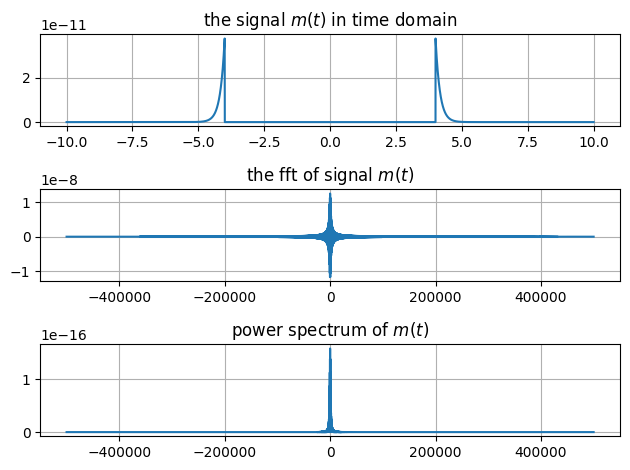

In [38]:
# the plottings
plt.subplot(3,1,1)
plt.plot(t,m_t)
plt.title('the signal $m(t)$ in time domain')
plt.grid(True)
plt.subplot(3,1,2)
plt.plot(actual_frequencies,fft_m_t)
plt.grid(True)
plt.title('the fft of signal $m(t)$')
plt.subplot(3,1,3)
plt.plot(actual_frequencies, power_spectrum_m_t)
plt.grid(True)
plt.title('power spectrum of $m(t)$')
plt.tight_layout()
plt.show()

As you can see the Frequency spectrum of $m(t)$ is in synch with what we theoretically stateed earlier, and the more we increase the time upon which we define our function, the more the fft will be resembel to the fourier transform of the message.

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\USER\AppData\Local\Temp\ipykernel_16756\1047930169.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.title('modulated signal $s(t) = (1 + \mu m(t))\cos(2 \pi f_c t)$')


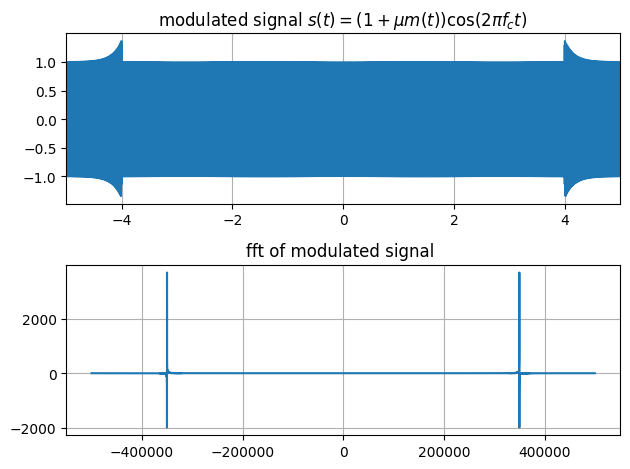

In [39]:
########################## ----- params
f_c = 350                                             # central frequency in Hz
mu = 0.1 * 1e11                                       # modulation index
c_t = np.cos(2 * np.pi * f_c * t)                     # carrier signal
mod_m_t = (1 + mu*m_t) * np.cos(2*np.pi*f_c*t)        # modulated signal
fft_mod_m_t = np.fft.fftshift(np.fft.fft(mod_m_t))    # fft of modulated signal

########################## ----- the plottings
plt.subplot(2,1,1)
plt.plot(t,mod_m_t)
plt.title('modulated signal $s(t) = (1 + \mu m(t))\cos(2 \pi f_c t)$')
plt.xlim([-5,5])
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(actual_frequencies,fft_mod_m_t)
plt.title('fft of modulated signal ')
plt.grid(True)
plt.tight_layout()
plt.show()

As we expected, two surges in frequencie appreared, which means that the Fourier transform of the $m(t)$ is shifted and centered at the carrier frequnecy; which is the essence of premise of AM Modulation!

# 1.3 , 1.4:
In this section, we will implement an envelope detector by code. It will behave such that while the input signal is rising, the output follows the input, and when it started to fall down, it decreases exponentially with time. Here is the code of such fucntion named
envelope_detector:

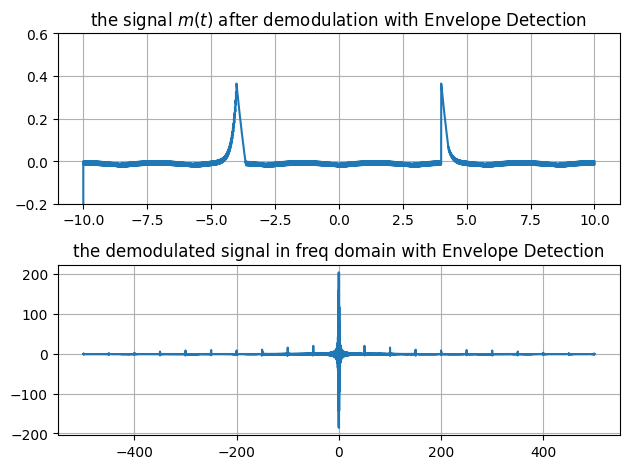

In [41]:

def envelope_detector(x_t, decay_rate=0.95 ):
    y_t = np.zeros_like(x_t)
    envelope = x_t[0]
    for i in range(1, len(x_t)):
        if x_t[i] >= envelope:
            envelope = x_t[i]
        else:
            envelope *= decay_rate
        y_t[i] = envelope     
    return y_t

#################################  ---- defining the signal in time in freq domain
T = 10
t = np.linspace(-T, T, 20000)
m_t = np.exp(-6 * t) * (t-4 >= 0)*(t-8 <= 0) + np.exp(6 * t) * (-t-4 >= 0)* (-t-8 <=0)
fft_m_t = np.fft.fftshift(np.fft.fft(m_t))
freqs = np.fft.fftshift(np.fft.fftfreq(len(t), t[1] - t[0]))
################################# ---- modulation params
f_c = 350
mu = 0.1 * 1e11
c_t = np.cos(2 * np.pi * f_c * t)
mod_m_t = (1 + mu*m_t) * np.cos(2*np.pi*f_c*t) 
fft_mod_m_t = np.fft.fftshift(np.fft.fft(mod_m_t))
################################ ---- coherent detection with envelope detector
env_mod_m_t = envelope_detector(mod_m_t, 0.99911) - 1
fft_env_mod_m_t = np.fft.fftshift(np.fft.fft(env_mod_m_t))

plt.subplot(2,1,1)
plt.plot(t,env_mod_m_t)
plt.title('the signal $m(t)$ after demodulation with Envelope Detection')
plt.ylim([-0.2,0.6])
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(freqs, fft_env_mod_m_t)
plt.title('the demodulated signal in freq domain with Envelope Detection')
plt.grid(True)
plt.tight_layout()
plt.show()

As you can see, the signal is a bit distorted, and that is envelope detector's fault since it brings on non-linear effects to the 
output due to perpetauation of the RC charge-decharge process.

# 1.5:

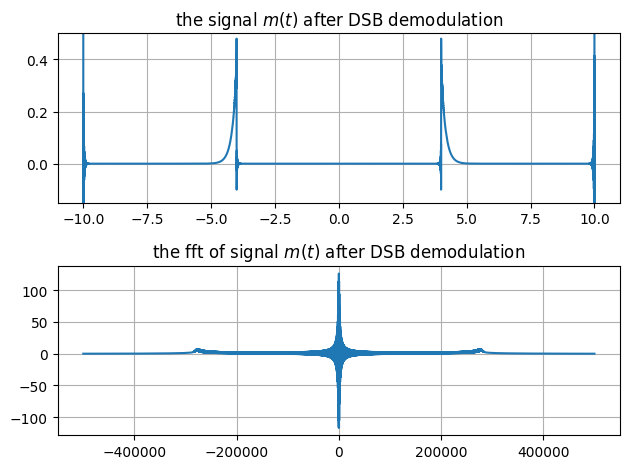

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
#################################  ---- defining the signal in time in freq domain
T = 10
t = np.linspace(-T, T, 20000)
m_t = np.exp(-6 * t) * (t-4 >= 0)*(t-8 <= 0) + np.exp(6 * t) * (-t-4 >= 0)* (-t-8 <=0)
fft_m_t = np.fft.fftshift(np.fft.fft(m_t))
freqs = np.fft.fftshift(np.fft.fftfreq(len(t), t[1] - t[0]))
################################# ---- modulation params
f_c = 350
mu = 0.1 * 1e11
c_t = np.cos(2 * np.pi * f_c * t)
mod_m_t = (1 + mu*m_t) * np.cos(2*np.pi*f_c*t) 
fft_mod_m_t = np.fft.fftshift(np.fft.fft(mod_m_t))
################################ ---- coherent detection with envelope detector
y_t = mod_m_t * 2 *np.cos(2*np.pi*f_c*t)

# Design a Butterworth low pass filter
def butter_lowpass_filter(input, cutoff, fs, order):
    def butter_lowpass(cutoff, fs, order):
        nyq = 0.5 * fs                          # Nyquist frequency
        normal_cutoff = cutoff / nyq            # Normalized cutoff frequency
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a
    b, a = butter_lowpass(cutoff, fs, order)
    output = filtfilt(b, a, input)
    return output

y_lowpass_t = butter_lowpass_filter(y_t, 279, fs, order=50)    # applying the low pass filter 
y_lowpass_t -=1                                                # The DC block
fft_y_lowpass_t = np.fft.fftshift(np.fft.fft(y_lowpass_t))

# the plottings
plt.subplot(2,1,1)
plt.plot(t,y_lowpass_t)
plt.ylim([-0.15, 0.5])
plt.title('the signal $m(t)$ after DSB demodulation')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(actual_frequencies, fft_y_lowpass_t)
plt.title('the fft of signal $m(t)$ after DSB demodulation')
plt.grid(True)
plt.tight_layout()
plt.show()

In this section, we demodulated the signal using DSB coherent demodulation. Fistly, we multiplied a cosine of freqiency $f_c$ and afterwards,
we will apply a low pass filter to eliminate $2f_c$-centered frequencies. Thus, only frequencies will remain that are dc-centered. We also took a high order of butterworth low pass filter in order to make it even more flat with ess transition time.
 
And as you can see wew got some $\tilde{m}(t)$ really resembalant to what we defined as our message $m(t)$.

# 1.6:
# 1.6:

Envelope detector usually performs  better than old-fashioned Coehrent detector.

(*) Envelope Detector:

- Disadvantages:
    - Nonlinear Effects: Envelope detectors are sensitive to non-linearities and may be affected by distortions.
    - Limited to AM: Envelope detectors are most suitable for AM signals and may not be appropriate for other modulation schemes.
- Advantages:
    - Amplitude Modulation (AM): Envelope detection is commonly used for demodulating AM signals.
    - Simplicity: Envelope detection is a relatively simple and cost-effective demodulation method.
    - Low Complexity: It requires fewer components compared to a coherent detector.

(*) Coherent Detector:
- Disadvantages:
    - Complexity: Coherent detection involves more complex circuitry and requires accurate carrier phase and frequency synchronization.
    - Cost: The implementation of coherent detection can be more expensive than envelope detection.
    - Vulnerability to Phase and Frequency Errors: Coherent detection is sensitive to phase and frequency errors, which may arise due to channel impairments.
- Advantages:
    - Phase and Frequency Information: Coherent detection can provide both phase and frequency information of the modulated signal.
    - Higher Performance: In the presence of noise and interference, coherent detection can offer better performance.
    - Suitable for Various Modulation Schemes: Coherent detection is more versatile and can be used for various modulation schemes, including phase and frequency modulation.

# 1.7, 1.8:

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


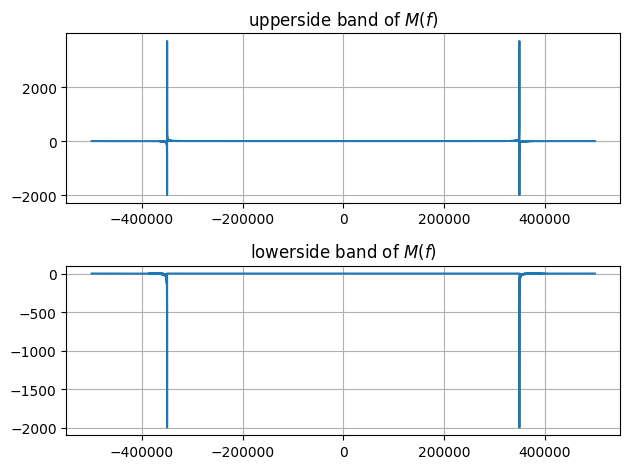

In [112]:
#################################  ---- defining the signal in time in freq domain
T = 10
t = np.linspace(-T, T, 20000)
m_t = np.exp(-6 * t) * (t-4 >= 0)*(t-8 <= 0) + np.exp(6 * t) * (-t-4 >= 0)* (-t-8 <=0)
fft_m_t = np.fft.fftshift(np.fft.fft(m_t))
freqs = np.fft.fftshift(np.fft.fftfreq(len(t), t[1] - t[0]))
################################ ---- defining the ussb and lssb of signal
window_ussb = (freqs <= f_c) + (freqs >= -f_c)
window_lssb = (freqs >= f_c) + (freqs <= -f_c)
fft_mod_m_ussb = window_ussb * fft_mod_m_t
fft_mod_m_lssb = window_lssb * fft_mod_m_t
m_ussb_t = np.fft.ifft(np.fft.ifftshift(fft_mod_m_ussb))
m_lssb_t = np.fft.ifft(np.fft.ifftshift(fft_mod_m_lssb))
################################# ---- modulation params
f_c = 350
mu = 0.1 * 1e11
c_t = np.cos(2 * np.pi * f_c * t)
mod_m_t = (1 + mu*m_t) * np.cos(2*np.pi*f_c*t) 
fft_mod_m_t = np.fft.fftshift(np.fft.fft(mod_m_t))
################################# ---- plottings
plt.subplot(2,1,1)
plt.plot(actual_frequencies, fft_mod_m_ussb)
plt.title('upperside band of $M(f)$')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(actual_frequencies, fft_mod_m_lssb)
plt.title('lowerside band of $M(f)$')
plt.grid(True)
plt.tight_layout()
plt.show()

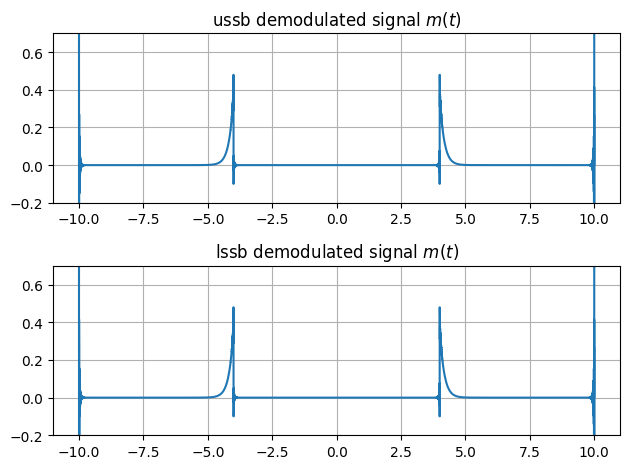

In [120]:
#################################  ---- defining the signal in time in freq domain
T = 10
t = np.linspace(-T, T, 20000)
m_t = np.exp(-6 * t) * (t-4 >= 0)*(t-8 <= 0) + np.exp(6 * t) * (-t-4 >= 0)* (-t-8 <=0)
fft_m_t = np.fft.fftshift(np.fft.fft(m_t))
freqs = np.fft.fftshift(np.fft.fftfreq(len(t), t[1] - t[0]))
################################ ---- defining the ussb and lssb of signal
window_ussb = (freqs <= f_c) + (freqs >= -f_c)
window_lssb = (freqs >= f_c) + (freqs <= -f_c)
fft_mod_m_ussb = window_ussb * fft_mod_m_t
fft_mod_m_lssb = window_lssb * fft_mod_m_t
m_ussb_t = np.fft.ifft(np.fft.ifftshift(fft_mod_m_ussb))
m_lssb_t = np.fft.ifft(np.fft.ifftshift(fft_mod_m_lssb))
################################# ---- modulation params
f_c = 350
mu = 0.1 * 1e11
c_t = np.cos(2 * np.pi * f_c * t)
mod_m_ussb_t = (1 + mu*m_ussb_t) * np.cos(2*np.pi*f_c*t) 
mod_m_lssb_t = (1 + mu*m_lssb_t) * np.cos(2*np.pi*f_c*t) 
############################### ---- coherent demodulation 
y_ussb_t = mod_m_ussb_t * 2 *np.cos(2*np.pi*f_c*t)
y_lssb_t = mod_m_lssb_t * 2 *np.cos(2*np.pi*f_c*t)

############################### ---- designing a Butterworth low pass filter
def butter_lowpass_filter(input, cutoff, fs, order):
    def butter_lowpass(cutoff, fs, order):
        nyq = 0.5 * fs                          # Nyquist frequency
        normal_cutoff = cutoff / nyq            # Normalized cutoff frequency
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a
    b, a = butter_lowpass(cutoff, fs, order)
    output = filtfilt(b, a, input)
    return output

y_lowpass_ussb_t = butter_lowpass_filter(y_t, 279, fs, order=50)    # applying the low pass filter 
y_lowpass_ussb_t -=1                                                # The DC block
fft_y_lowpass_ussb_t = np.fft.fftshift(np.fft.fft(y_lowpass_ussb_t))

y_lowpass_lssb_t = butter_lowpass_filter(y_t, 279, fs, order=50)    # applying the low pass filter 
y_lowpass_lssb_t -=1                                                # The DC block
fft_y_lowpass_lssb_t = np.fft.fftshift(np.fft.fft(y_lowpass_lssb_t))

############################### ---- plottings
plt.subplot(2,1,1)
plt.plot(t,y_lowpass_ussb_t)
plt.title('ussb demodulated signal $m(t)$')
plt.grid(True)
plt.ylim([-0.2, 0.7])
plt.subplot(2,1,2)
plt.plot(t,y_lowpass_lssb_t)
plt.title('lssb demodulated signal $m(t)$')
plt.grid(True)
plt.ylim([-0.2, 0.7])
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


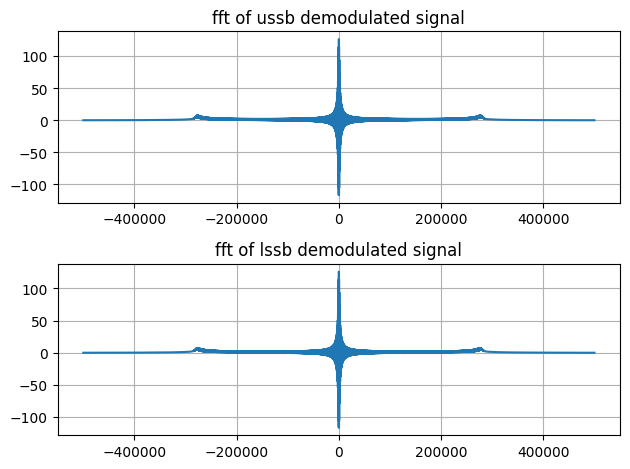

In [118]:
plt.subplot(2,1,1)
plt.plot(actual_frequencies,fft_y_lowpass_ussb_t)
plt.title('fft of ussb demodulated signal')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(actual_frequencies,fft_y_lowpass_lssb_t)
plt.title('fft of lssb demodulated signal')
plt.grid(True)
plt.tight_layout()
plt.show()

As you can see, we windowed higher an lower frequencies with respect to $f_c$ in order to get ussb and lssb signals, and at the end 
we used SSb technique in orer to demodlate our desired signal.

And as you can see, we got some $\tilde{m}(t)$ really resembalant to what we defined as our message $m(t)$. Furtheermore, we can check that the result from USSB modulation is exactly similar to the result from LSSB modulation.

# 1.9:
- AM Modulation:
  Firstly, AM Modulation can Modulate both the upper and lower sidebands along with the carrier.
  Secondly, Provides a simple and easy-to-implement modulation method.
  Thirdly, Spectrum includes a carrier and two sidebands.
- USSB Modulation (Upper Sideband Suppressed):
  Firstly,Suppresses the lower sideband, transmitting only the upper sideband.
  Secondly,  Reduces bandwidth requirements compared to AM.
  Thirdly, Simplifies the demodulation process.
- LSSB Modulation (Lower Sideband Suppressed):
  Firstly, Suppresses the upper sideband, transmitting only the lower sideband.
  Secondly, Similar advantages to USSB in terms of bandwidth reduction.
  Thirdly, Demodulation is simpler compared to full AM modulation.


# Advantages and Disadvantages:

- AM Modulation:

- Advantages: Simple and widely used / Suitable for voice and music transmission.
- Disadvantages: Inefficient use of bandwidth / Prone to interference and noise.

USSB and LSSB Modulation:

- Advantages: Bandwidth-efficient compared to AM / Reduced susceptibility to interference/ Simplified demodulation.

- Disadvantages: Requires more complex circuitry for modulation and demodulation/ Less common in practical applications compared to AM.

# 1.10:

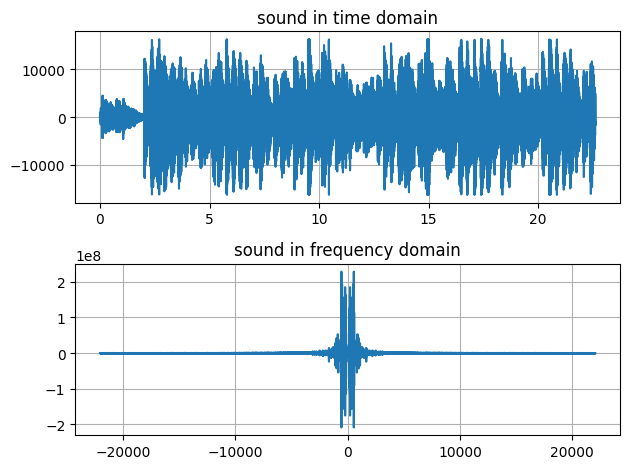

In [21]:

import wave
import numpy as np
import matplotlib.pyplot as plt

wav_obj = wave.open(r"C:\Users\USER\Downloads\sound.wav", 'rb')

sample_freq = wav_obj.getframerate()
fs = sample_freq
n_samples = wav_obj.getnframes()
t_audio = n_samples/sample_freq
n_channels = wav_obj.getnchannels()
signal_wave = wav_obj.readframes(n_samples)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
l_channel = signal_array[0::2]
r_channel = signal_array[1::2]
mono = (l_channel+r_channel)/2

t = np.linspace(0, n_samples/sample_freq, num=n_samples)
m_t = mono
fft_m_t = np.fft.fftshift(np.fft.fft(m_t))
freqs = np.fft.fftshift(np.fft.fftfreq(len(t), t[1] - t[0]))

plt.subplot(2,1,1)
plt.plot(t,m_t)
plt.title('sound in time domain')
plt.grid(True)
plt.subplot(2,1,2)
plt.title('sound in frequency domain')
plt.plot(freqs, fft_m_t)
plt.grid(True)
plt.tight_layout()
plt.show()

We Will get it using coherent and non-coherent signal

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

f_c = 10000
mu = 0.5
c_t = np.cos(2 * np.pi * f_c * t)
mod_m_t = (1 + mu * m_t) * np.cos(2*np.pi*f_c*t) 
fft_mod_m_t = np.fft.fftshift(np.fft.fft(mod_m_t))
freqs = np.fft.fftshift(np.fft.fftfreq(len(t), t[1] - t[0]))
################################ ---- coherent detection with envelope detector
y_t = mod_m_t * 2 *np.cos(2*np.pi*f_c*t)

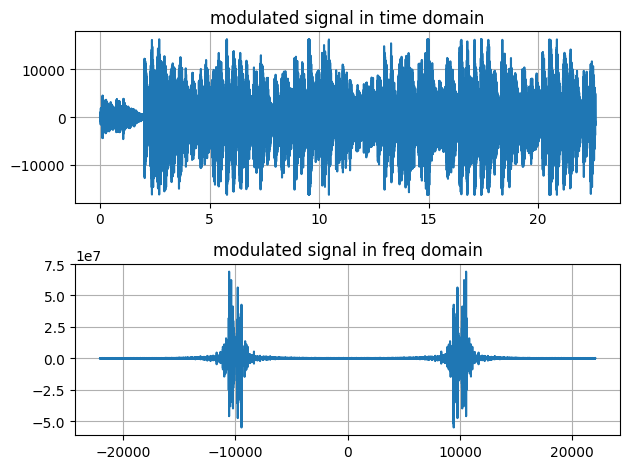

In [30]:
plt.subplot(2,1,1)
plt.plot(t,m_t)
plt.title('modulated signal in time domain')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(freqs, fft_mod_m_t)
plt.title('modulated signal in freq domain')
plt.grid(True)
plt.tight_layout()
plt.show()

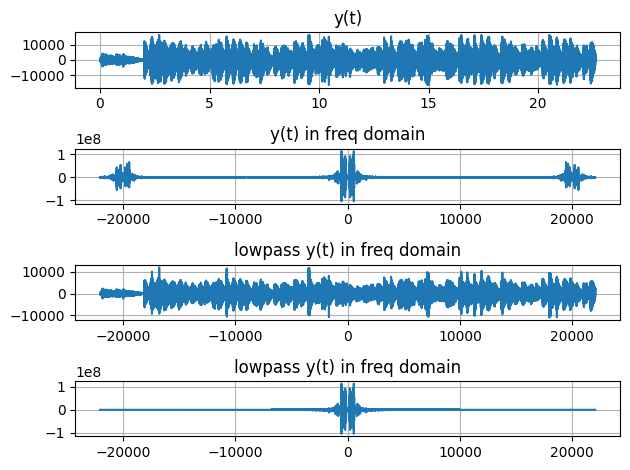

In [34]:
#envelope = np.abs(mod_m_t)
y_t = mod_m_t *2 * np.cos(2 * np.pi * f_c * t)
fft_y_t =  np.fft.fftshift(np.fft.fft(y_t))\
    
fft_y_t_lowpass  = fft_y_t *(freqs >= -f_c) * (freqs <= f_c)
y_t_lowpass = np.fft.ifft(np.fft.ifftshift(fft_y_t_lowpass))
    
plt.subplot(4,1,1)
plt.plot(t,y_t)
plt.title('y(t)')
plt.grid(True)
plt.subplot(4,1,2)
plt.plot(freqs, fft_y_t)
plt.title('y(t) in freq domain')
plt.grid(True)
plt.subplot(4,1,3)
plt.plot(freqs, y_t_lowpass)
plt.title('lowpass y(t) in freq domain')
plt.grid(True)
plt.subplot(4,1,4)
plt.plot(freqs, fft_y_t_lowpass)
plt.title('lowpass y(t) in freq domain')
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
import numpy as np
import soundfile as sf

samples = 2*y_t_lowpass
samples = np.real(samples).astype(np.float32)

# Write the array to a Wav file with 1 channel, 16-bit samples, and 16 kHz sampling rate
sf.write("output.wav", samples, fs, subtype="PCM_16")

The output file is in the files , but as you plpay it , there is a slight distortion in the output. 

# FM Modulation

# 2.3:

In [8]:
############################# ----- main params
fs = 10e3                                             # Sampling freq 
A_c = 1                                               # Amp of the carrier signal
fc = 200                                              # Freq of the carrier signal
delta_f = 30                                          # Freq deviation (Hz/V)
duration = 1                                          # Duration of the signal
t = np.arange(0, duration, 1/fs)                      # Sample the Message Signal
m_t = np.sin(25 * np.pi * t)                          # the message itself
############################## ----- modulating
delta_f_t = delta_f * m_t
phi_t = 2 * np.pi * np.cumsum(delta_f_t) / fs         # Integration
mod_m_t = A_c * np.cos(2 * np.pi * fc * t + phi_t)    # FM  modulated Signal

x1 = mod_m_t

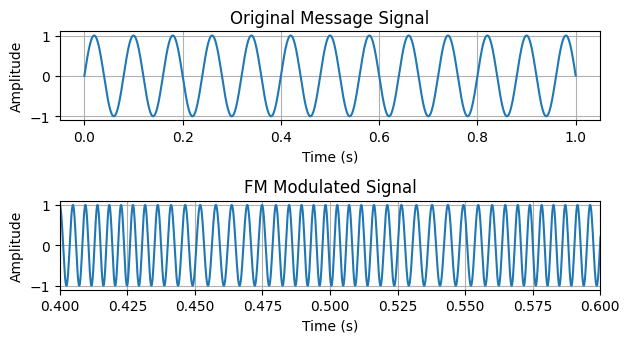

In [21]:
plt.subplot(3, 1, 1)
plt.plot(t, m_t, label='Original Message Signal')
plt.title('Original Message Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(t, mod_m_t, label='FM Modulated Signal')
plt.title('FM Modulated Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim([0.4, 0.6])
plt.grid(True)
plt.tight_layout()

# 2.2:

In [9]:
from scipy.signal import detrend, hilbert

fs = 10e3                                     # Sampling freq 
A_c = 1                                       # Amp of the carrier signal
fc = 200                                      # Freq of the carrier signal
delta_f = 30                                  # Freq deviation (Hz/V)
duration = 1                                  # Duration of the signal
t = np.arange(0, duration, 1/fs)              # Sample the Message Signal
m_t = np.sin(25 * np.pi * t)                  # the message itself


# FM modulated signal
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
m_t = np.sin(25 * np.pi * t)
delta_f_t = delta_f * m_t                       # freq deviation 
phi_t = 2 * np.pi * np.cumsum(delta_f_t) / fs   # Integration 
xc_t = A_c * np.cos(2 * np.pi * fc * t + phi_t)  
# differentiating
xd_t = -A_c*(2*np.pi*f_c +2*np.pi *delta_f* m_t) * np.sin(2*np.pi*f_c*t + 2*np.pi*delta_f *np.cumsum(m_t)/fs)

# Demodulation using Hilbert transform
analytic_signal = hilbert(xc_t)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) * fs / (2 * np.pi)
restored_message = detrend(instantaneous_frequency) / 31

# finally the restored message
x2 = restored_message



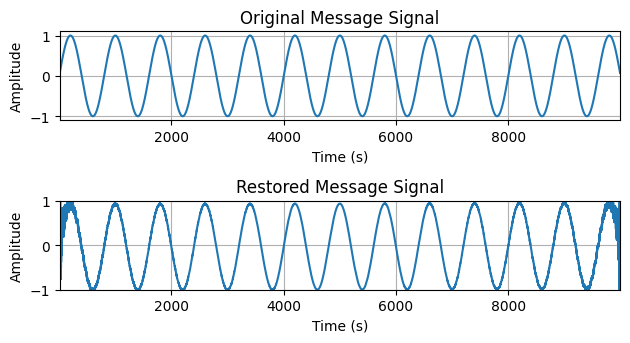

In [29]:
############ ---- plottings
plt.subplot(3, 1, 1)
plt.plot(m_t, label='Original Message Signal')
plt.title('Original Message Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(10, 9990)
plt.subplot(3, 1, 2)
plt.plot(restored_message, label='Restored Message Signal')
plt.title('Restored Message Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(10, 9990)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

# 2.3 :

In [11]:
import numpy as np
from scipy.signal import butter, filtfilt
############################## ------ params
fs = 10e3                                     # Sampling freq 
A_c = 1                                       # Amp of the carrier signal
f_c = 200                                      # Freq of the carrier signal
delta_f = 30                                  # Freq deviation (Hz/V)
duration = 1                                  # Duration of the signal
t = np.arange(0, duration, 1/fs)              # Sample the Message Signal
m_t = np.sin(25 * np.pi * t)                  # the message itself
############################## ------ defining the signals 
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
m_t = np.sin(25 * np.pi * t)
xc_t = A_c * np.cos(2 * np.pi * f_c * t + 2 * np.pi * delta_f * np.cumsum(m_t) / fs)
xd_t = -A_c*(2*np.pi*f_c +2*np.pi *delta_f* m_t) * np.sin(2*np.pi*f_c*t + 2*np.pi*delta_f *np.cumsum(m_t)/fs)
############################## ------ Envelope detection
def envelope_detector(input, fs, cutoff_freq):
    # LPF
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(1, normal_cutoff, btype='low', analog=False)
    envelope = np.abs(filtfilt(b, a, input))
    return envelope

# time constant
tau = 0.00008

# Envelope detection
envelope = envelope_detector(xd_t, fs, cutoff_freq=1/(2*np.pi*tau))

x3 = envelope

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USER\AppData\Local\Temp\ipykernel_16756\3505485621.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$x_c(t) = A_c \cos(2\pi f_c t + 2\pi f_\Delta t \int m(x ) dx)$')


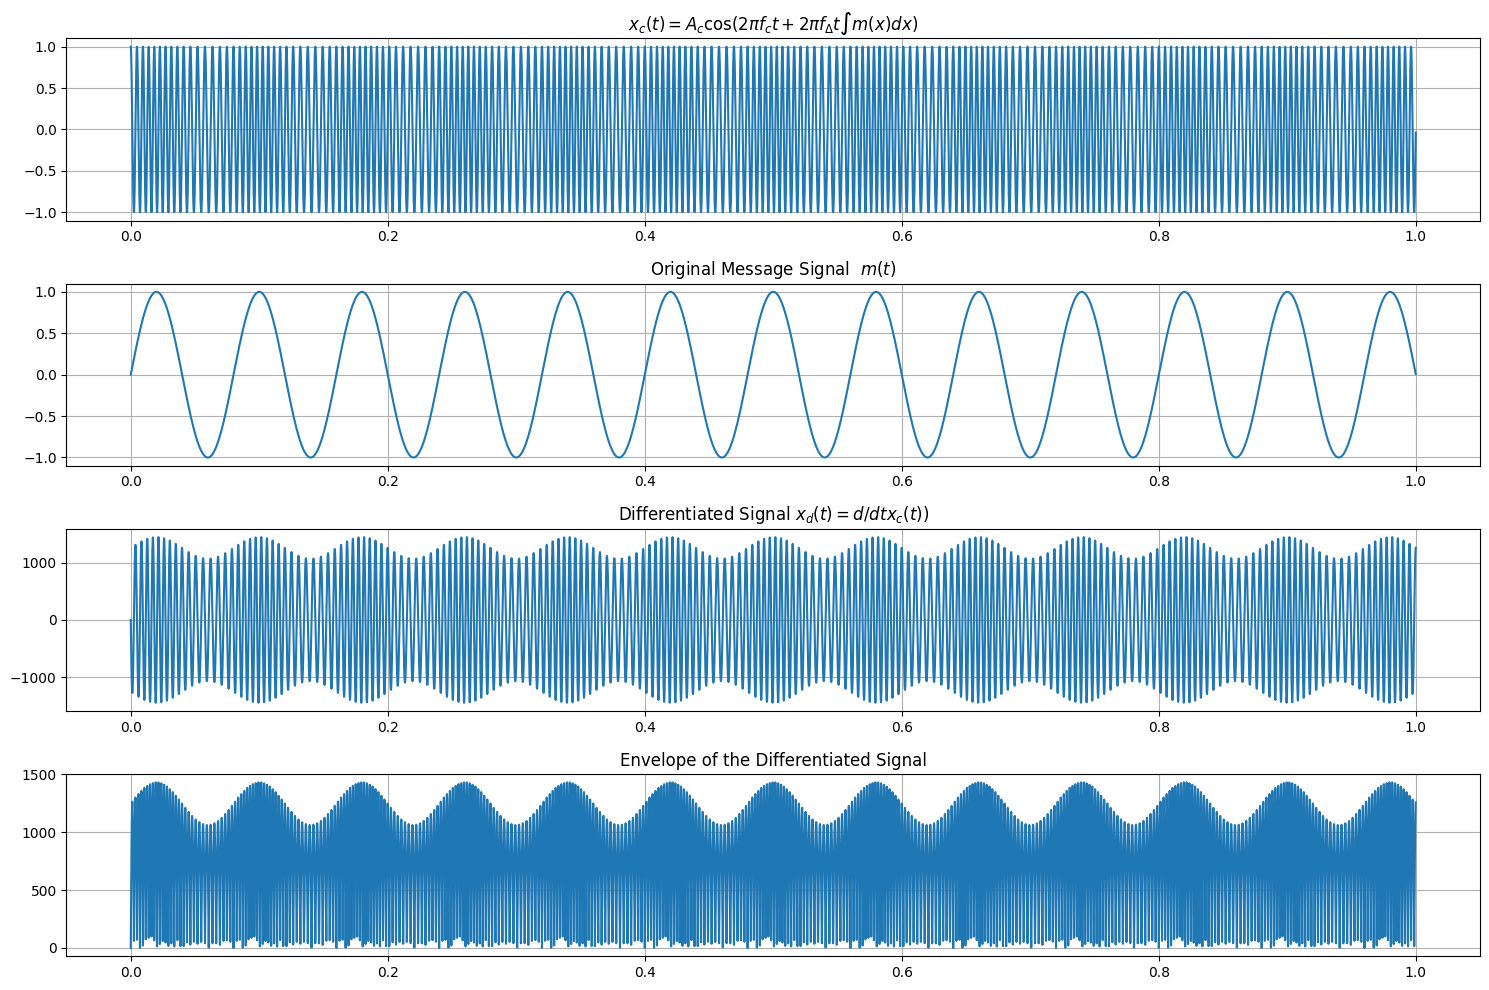

In [35]:
plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 1)
plt.plot(t, xc_t, label='xc')
plt.title('$x_c(t) = A_c \cos(2\pi f_c t + 2\pi f_\Delta t \int m(x ) dx)$')
plt.grid(True)
plt.subplot(4, 1, 2)
plt.plot(t, m_t, label='Original Message Signal')
plt.title('Original Message Signal  $m(t)$')
plt.grid(True)
plt.subplot(4, 1, 3)
plt.plot(t, xd_t, label='Differentiated Signal ')
plt.title('Differentiated Signal $x_d(t) = d/dt x_c (t) )$')
plt.grid(True)
plt.subplot(4, 1, 4)
plt.plot(t, envelope, label='Enveloped Signal')
plt.title('Envelope of the Differentiated Signal')
plt.grid(True)
plt.tight_layout()

# 2.4 :

In [5]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
############################## ------ params
fs = 10e3                                     # Sampling freq 
A_c = 1                                       # Amp of the carrier signal
f_c = 200                                      # Freq of the carrier signal
delta_f = 30                                  # Freq deviation (Hz/V)
duration = 1                                  # Duration of the signal
t = np.arange(0, duration, 1/fs)              # Sample the Message Signal
m_t = np.sin(25 * np.pi * t)                  # the message itself
############################## ------ defining the signals 
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
m_t = np.sin(25 * np.pi * t)
xc_t = A_c * np.cos(2 * np.pi * f_c * t + 2 * np.pi * delta_f * np.cumsum(m_t) / fs)
xd_t = -A_c*(2*np.pi*f_c +2*np.pi *delta_f* m_t) * np.sin(2*np.pi*f_c*t + 2*np.pi*delta_f *np.cumsum(m_t)/fs)
############################## ------ Zero Crossing Detector
zero_crossings = np.where(np.diff(np.sign(xc_t)))[0]
pulse_duration = 0.0001  # Adjust as needed
pulse_signal = np.zeros_like(t)
for zero_crossing in zero_crossings:
    pulse_signal[zero_crossing:zero_crossing + int(pulse_duration * fs)] = 1
############################## ------ defining Lowpass filter as before
def low_pass_filter(signal, fs, cutoff_freq):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(1, normal_cutoff, btype='low', analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal
############################## ------  Applying LPF to smooth the pulse signal
cutoff_freq = 22  
smoothed_pulse = low_pass_filter(pulse_signal, fs, cutoff_freq)
############################## ------ DC Block
dc_block_signal = smoothed_pulse - np.mean(smoothed_pulse)
dc_block_signal *= 220

x4 = dc_block_signal

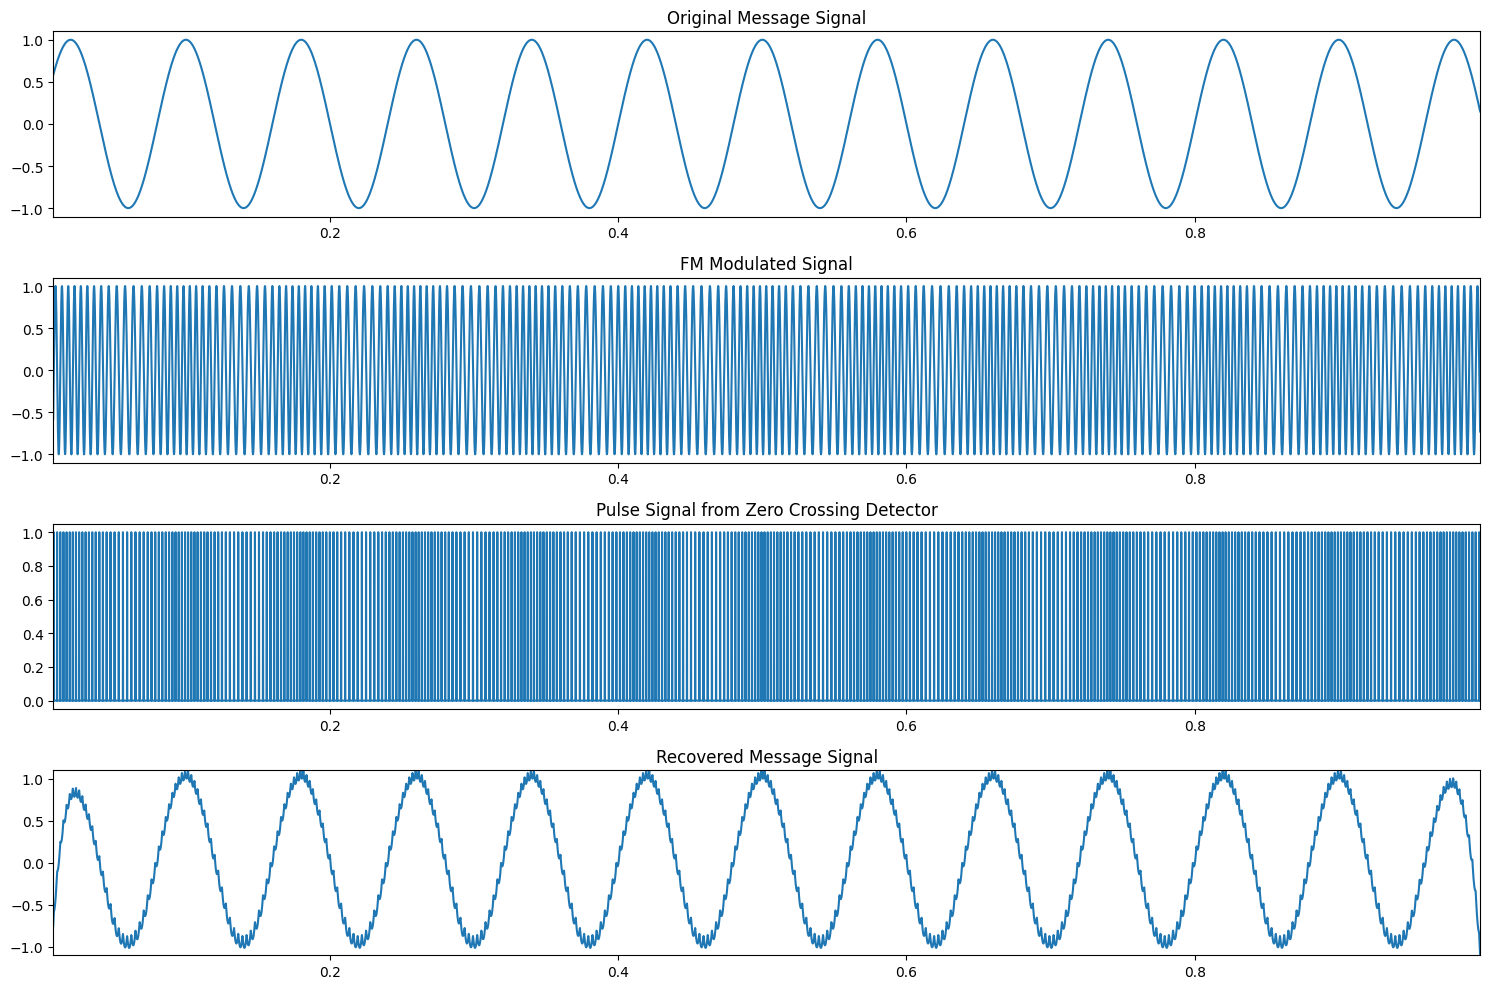

In [6]:
plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 1)
plt.plot(t, m_t, label='Original Message Signal')
plt.title('Original Message Signal')
plt.xlim(0.008,0.998)
plt.subplot(4, 1, 2)
plt.plot(t, xc_t, label='FM Modulated Signal')
plt.title('FM Modulated Signal')
plt.xlim(0.008,0.998)
plt.subplot(4, 1, 3)
plt.plot(t, pulse_signal, label='Pulse Signal')
plt.title('Pulse Signal from Zero Crossing Detector')
plt.xlim(0.008,0.998)
plt.subplot(4, 1, 4)
plt.plot(t, dc_block_signal, label='Recovered Message')
plt.title('Recovered Message Signal')
plt.xlim(0.008,0.998)
plt.ylim(-1.1, 1.1)
plt.tight_layout()


# 2.5 :

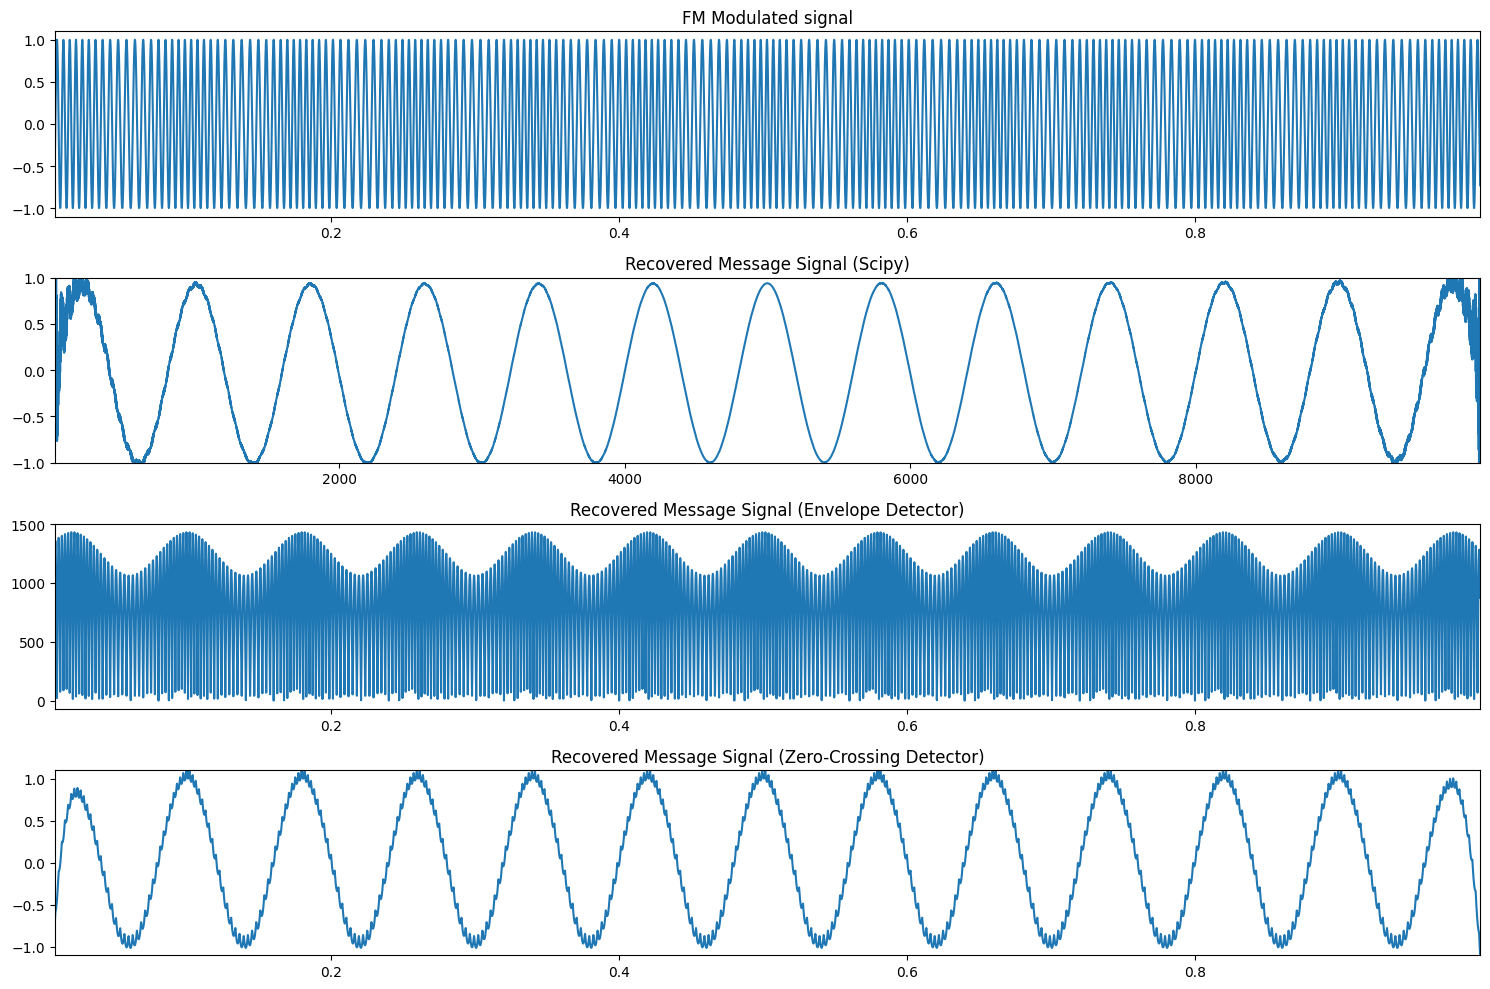

In [12]:

plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 1)
plt.plot(t, x1, label='FM Modulated signal')
plt.title('FM Modulated signal')
plt.xlim(0.008,0.998)
plt.subplot(4, 1, 2)
plt.plot(x2, label='Recovered Message Signal (Scipy)')
plt.title('Recovered Message Signal (Scipy)')
plt.xlim(10, 9990)
plt.ylim(-1, 1)
plt.subplot(4, 1, 3)
plt.plot(t, x3, label='Recovered Message Signal (ED)')
plt.title('Recovered Message Signal (Envelope Detector)')
plt.xlim(0.008,0.998)
plt.subplot(4, 1, 4)
plt.plot(t, x4, label='Recovered Message Signal (ZCD)')
plt.title('Recovered Message Signal (Zero-Crossing Detector)')
plt.xlim(0.008,0.998)
plt.ylim(-1.1, 1.1)
plt.tight_layout()